In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.display import display
%pip install yfinance

import yfinance as yf



Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data Wrangling 
#Load Data 

ccdata= pd.read_csv('./Data/cci30_OHLCV.csv')
ccmonthlyweights = pd.read_csv('./Data/cci30_monthly_weights.csv')

In [3]:
#Data Cleaning
#checking ccdata for errors

ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2342 non-null   object 
 1   Open    2342 non-null   float64
 2   High    2342 non-null   float64
 3   Low     2342 non-null   float64
 4   Close   2342 non-null   float64
 5   Volume  2341 non-null   float64
dtypes: float64(5), object(1)
memory usage: 109.9+ KB


In [4]:
# 1 missing value in volume

ccdata[ccdata['Volume'].isna()].head()

#will not drop na as there is still relevant data in other columns, will replace it with 0
#ccdata.loc[ccdata['Volume'].isna(), 'Volume'] = 0
#ccdata.loc[181,:] 

ccdata.describe()

,Open,High,Low,Close,Volume
count,2342.000000,2342.000000,2342.000000,2342.000000,2.341000e+03
mean,3934.902921,4119.264889,3741.635351,3943.098772,2.891675e+10
std,5280.859083,5599.330394,4940.691038,5290.710903,4.742676e+10
min,57.458000,66.286200,54.708400,57.720500,0.000000e+00
25%,259.287500,267.467500,251.346500,259.209750,0.000000e+00
50%,2900.950000,3001.200000,2825.540000,2906.175000,8.881016e+09
75%,4479.337500,4615.542500,4340.630000,4481.767500,4.092268e+10
max,33472.100000,34993.000000,31812.800000,33483.900000,3.780853e+11


In [5]:
#convert Object to datetime
ccdata['Date'] = pd.to_datetime(ccdata['Date'])

In [6]:
ccdata

,Date,Open,High,Low,Close,Volume
0,2021-05-30,18263.6000,19823.6000,17431.8000,19128.7000,8.993216e+10
1,2021-05-29,19265.3000,20237.8000,17487.5000,18265.0000,1.259290e+11
2,2021-05-28,21247.8000,21661.1000,18483.7000,19277.5000,1.454041e+11
3,2021-05-27,22122.7000,22549.1000,20279.3000,21177.8000,1.187111e+11
4,2021-05-26,20514.4000,22704.1000,20142.7000,22122.0000,1.417899e+11
...,...,...,...,...,...,...
2337,2015-01-05,82.3484,88.3190,81.5787,86.2289,0.000000e+00
2338,2015-01-04,89.2479,91.1656,79.8710,82.2132,0.000000e+00
2339,2015-01-03,100.2530,101.5400,88.7442,89.3769,0.000000e+00
2340,2015-01-02,99.9137,101.8690,98.7938,100.2180,0.000000e+00


In [7]:
pd.set_option('display.max_rows',121)

In [8]:
# Pull yahoo ticker data found on yahoo finance of top 30 cryptocurrencies by market cap

In [9]:
stock = ['BTC-USD',
        'ETH-USD',
        'USDT-USD',
        'BNB-USD',
        'ADA-USD',
        'DOGE-USD',
        'XRP-USD',
        'USDC-USD',
        'DOT1-USD',
        'HEX-USD',
        'UNI3-USD',
        'BCH-USD',
        'LTC-USD',
        'SOL1-USD',
        'LINK-USD',
        'MATIC-USD',
        'THETA-USD',
        'XLM-USD',
        'VET-USD',
        'ETC-USD',
        'TRX-USD',
        'ICP1-USD',
        'FIL-USD',
        'XMR-USD',
        'EOS-USD',
        'AMP1-USD',
        'AAVE-USD',
        'SHIB-USD',
        'ALGO-USD',
        'CRO-USD'
]

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,6,1)

sp = yf.download(stock,start = start, end = end, interval = '1d')
pd.set_option('display.max_rows',180)
pd.set_option('display.max_columns',180)

[*********************100%***********************]  30 of 30 completed


In [10]:
sp.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2343 entries, 2015-01-01 to 2021-06-01
Data columns (total 180 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, AAVE-USD)   62 non-null     float64
 1   (Adj Close, ADA-USD)    1336 non-null   float64
 2   (Adj Close, ALGO-USD)   595 non-null    float64
 3   (Adj Close, AMP1-USD)   62 non-null     float64
 4   (Adj Close, BCH-USD)    1406 non-null   float64
 5   (Adj Close, BNB-USD)    1404 non-null   float64
 6   (Adj Close, BTC-USD)    2340 non-null   float64
 7   (Adj Close, CRO-USD)    725 non-null    float64
 8   (Adj Close, DOGE-USD)   2340 non-null   float64
 9   (Adj Close, DOT1-USD)   266 non-null    float64
 10  (Adj Close, EOS-USD)    1428 non-null   float64
 11  (Adj Close, ETC-USD)    1770 non-null   float64
 12  (Adj Close, ETH-USD)    2122 non-null   float64
 13  (Adj Close, FIL-USD)    1105 non-null   float64
 14  (Adj Close, HEX-USD) 

In [26]:
#take just a "adj close" column from the data and drop na
stock_close_price = pd.DataFrame(sp['Adj Close'])
stock_close_price

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,HEX-USD,ICP1-USD,LINK-USD,LTC-USD,MATIC-USD,SHIB-USD,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,314.248993,NaN,0.000183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.699050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005493,0.465760,0.024390
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,315.032013,NaN,0.000186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.667360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005481,0.459137,0.024318
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,281.082001,NaN,0.000167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.133160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004672,0.461172,0.022106
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,264.195007,NaN,0.000158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.956680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004416,0.417234,0.018928
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,274.473999,NaN,0.000161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.082180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004947,0.421412,0.020316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,320.381165,1.511987,0.898697,0.036657,689.947876,329.879913,35697.605469,0.113855,0.311205,21.410093,6.120921,68.357330,2419.906250,66.820404,0.059215,115.765274,27.951693,177.320663,1.823294,0.000008,29.039276,6.564076,0.072087,25.924946,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,297.899628,1.406232,0.829413,0.033361,651.579956,305.052155,34616.066406,0.111285,0.303110,19.863375,6.018345,64.280930,2279.514160,68.212379,0.053971,110.516777,25.398640,163.808105,1.698194,0.000008,27.376421,6.313582,0.068783,23.179464,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,325.148407,1.577279,0.850180,0.037683,663.512024,325.784027,35678.128906,0.112185,0.302224,20.473988,6.042301,66.365997,2390.305420,68.422081,0.053939,111.353195,26.869602,170.978226,1.864938,0.000008,28.602659,6.545633,0.072036,25.742519,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


In [27]:
stock_close_price.isnull().sum()

AAVE-USD     2281
ADA-USD      1007
ALGO-USD     1748
AMP1-USD     2281
BCH-USD       937
BNB-USD       939
BTC-USD         3
CRO-USD      1618
DOGE-USD        3
DOT1-USD     2077
EOS-USD       915
ETC-USD       573
ETH-USD       221
FIL-USD      1238
HEX-USD      1993
ICP1-USD     2329
LINK-USD      996
LTC-USD         3
MATIC-USD    1760
SHIB-USD     2268
SOL1-USD     1953
THETA-USD    1118
TRX-USD       989
UNI3-USD     2280
USDC-USD     1437
USDT-USD       63
VET-USD      1322
XLM-USD         3
XMR-USD         3
XRP-USD         3
dtype: int64

In [35]:
stock_close_price = stock_close_price.fillna(stock_close_price.mean())

In [37]:

stock_close_price.to_csv("./Data/Yahoo_Stock_Prices.csv")

In [14]:
#Descriptive statistics on tables
ccdata
ccdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2342.0,3.934903e+03,5.280859e+03,57.4580,259.28750,2.900950e+03,4.479337e+03,3.347210e+04
High,2342.0,4.119265e+03,5.599330e+03,66.2862,267.46750,3.001200e+03,4.615543e+03,3.499300e+04
Low,2342.0,3.741635e+03,4.940691e+03,54.7084,251.34650,2.825540e+03,4.340630e+03,3.181280e+04
Close,2342.0,3.943099e+03,5.290711e+03,57.7205,259.20975,2.906175e+03,4.481767e+03,3.348390e+04
Volume,2341.0,2.891675e+10,4.742676e+10,0.0000,0.00000,8.881016e+09,4.092268e+10,3.780853e+11


In [15]:
#Mean of the High column by year
high_by_year = ccdata.groupby(ccdata['Date'].dt.year)['High'].mean()
high_by_year

Date
2015       84.735643
2016      219.296943
2017     3254.561258
2018     7053.777562
2019     3219.040795
2020     4282.695246
2021    20207.781067
Name: High, dtype: float64

Text(0, 0.5, 'High')

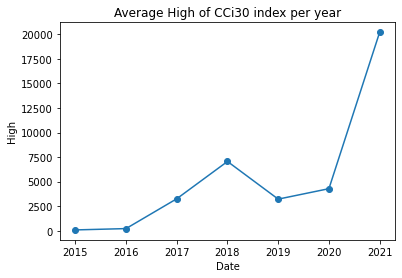

In [16]:
high_by_year.plot(kind = 'line', x = 'Date' , marker = 'o')
plt.title("Average High of CCi30 index per year")
plt.ylabel('High')

In [17]:
#Mean of Open by month and year 
high_by_month = ccdata.groupby([ccdata['Date'].dt.month, ccdata['Date'].dt.year])['High'].mean()

In [18]:
high_by_month

Date  Date
1     2015       82.581306
      2016      114.900645
      2017      327.245129
      2018    17096.600000
      2019     2200.492903
      2020     3215.263871
      2021    10244.082581
2     2015       71.826957
      2016      135.922345
      2017      364.309536
      2018    11065.335357
      2019     2175.480000
      2020     4232.994828
      2021    16160.935714
3     2015       74.578606
      2016      165.775129
      2017      512.898484
      2018     8466.880968
      2019     2469.361935
      2020     2875.952581
      2021    19323.638710
4     2015       72.695827
      2016      161.753267
      2017      807.359000
      2018     8028.595333
      2019     3171.585000
      2020     2934.999333
      2021    26802.756667
5     2015       73.895597
      2016      166.554387
      2017     1970.557097
      2018     9317.563871
      2019     3820.466129
      2020     3452.383548
      2021    28599.296667
6     2015       85.122093
      2016      2

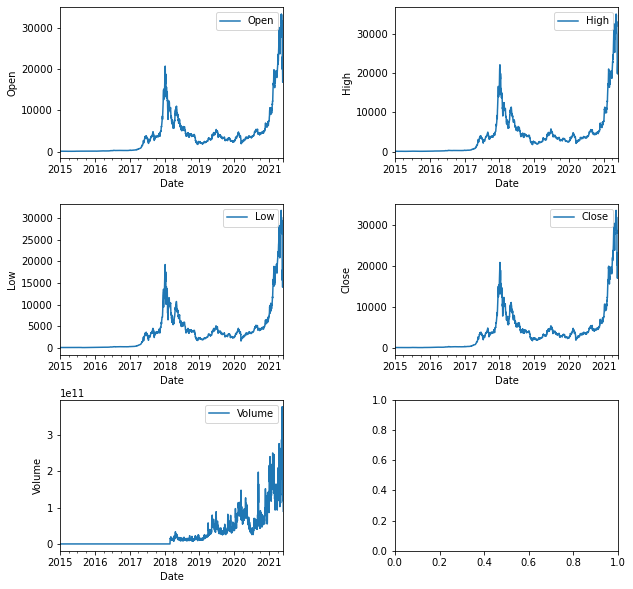

In [19]:
#plotting daily values of ccdata df
fig,ax = plt.subplots(3,2, figsize = (10,10))

ccdata.plot(kind ='line', x= 'Date', y = 'Open', ax =ax[0,0])
ax[0,0].set_ylabel('Open')

ccdata.plot(kind ='line', x= 'Date', y = 'High', ax=ax[0,1])
ax[0,1].set_ylabel('High')

ccdata.plot(kind ='line', x= 'Date', y = 'Low', ax=ax[1,0])
ax[1,0].set_ylabel('Low')

ccdata.plot(kind ='line', x= 'Date', y = 'Close', ax=ax[1,1])
ax[1,1].set_ylabel('Close')

ccdata.plot(kind ='line', x= 'Date', y = 'Volume', ax=ax[2,0])
ax[2,0].set_ylabel('Volume')

plt.subplots_adjust(wspace=0.5,hspace = 0.3)

In [20]:
#one peak in 2018, then another rise late 2020 to 2021

In [21]:
ccdateindex = ccdata.copy()

ccdateindex['month'] = ccdateindex['Date'].dt.month
ccdateindex['year'] = ccdateindex['Date'].dt.year

ccdateindex

,Date,Open,High,Low,Close,Volume,month,year
0,2021-05-30,18263.6000,19823.6000,17431.8000,19128.7000,8.993216e+10,5,2021
1,2021-05-29,19265.3000,20237.8000,17487.5000,18265.0000,1.259290e+11,5,2021
2,2021-05-28,21247.8000,21661.1000,18483.7000,19277.5000,1.454041e+11,5,2021
3,2021-05-27,22122.7000,22549.1000,20279.3000,21177.8000,1.187111e+11,5,2021
4,2021-05-26,20514.4000,22704.1000,20142.7000,22122.0000,1.417899e+11,5,2021
...,...,...,...,...,...,...,...,...
2337,2015-01-05,82.3484,88.3190,81.5787,86.2289,0.000000e+00,1,2015
2338,2015-01-04,89.2479,91.1656,79.8710,82.2132,0.000000e+00,1,2015
2339,2015-01-03,100.2530,101.5400,88.7442,89.3769,0.000000e+00,1,2015
2340,2015-01-02,99.9137,101.8690,98.7938,100.2180,0.000000e+00,1,2015


<AxesSubplot:xlabel='month', ylabel='Close'>

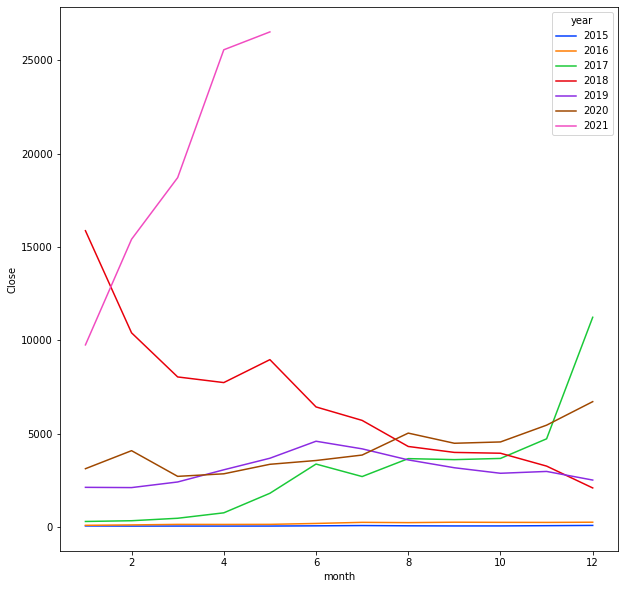

In [22]:
#plot closing price of CCI30 index by month and year
plt.figure(figsize =(10,10))
sns.lineplot(data = ccdateindex, x = 'month', y = 'Close',  hue = 'year', palette = 'bright', ci = None )
